In [1]:
import numpy as np
import matplotlib.pylab as plt

# Odhad přechodové matice v aplikaci

Máme k dispozici klastr 3 výpočetních strojů běžících v load balancingu. Supervizorský uzel, který rozděluje úlohy pro jednotlivé výpočetní uzly loguje situaci následovně:

- A: 3 uzly k dispozici ("OK")
- B: 2 uzly k dispozici ("OK")
- C: 1 uzel k dispozici ("OK")
- D: 0 uzlů k dispozici ("failure")

Mezi stavy se přepíná podle množství příchozích úloh a máme předpoklad, že toto přepínání lze modelovat homogenním markovským řetězcem. Ze stavu D se může objevit přeskok až do stavu A, např. v důsledku resetu klusteru.

K dispozici jsou měření v souboru "clusterfunc.txt".

**Úkol 1: otevřete soubor a vytvořte pole `mc`, v němž budou stavy reprezentovány číslicemi 0 (A) až 3 (D)**

In [2]:
fn = 'clusterfunc.txt'
with open(fn, 'r') as f:
    mc = f.read()

mc = [ord(i) - 97 for i in mc]
mc = np.array(mc)

**Úkol 2: vytvořte matici `trans_counts` a uložte do ní počty přechodů mezi jednotlivými stavy. Vykreslete tuto matici pomocí plt.imshow(), přidejte plt.colorbar() a interpretujte graf.**

[[1186. 1494.  168.  156.]
 [1310. 1609. 1342.  206.]
 [ 381. 1158.  391.   99.]
 [ 128.  205.  128.   38.]]


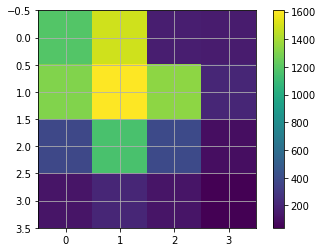

In [3]:
nstates = np.unique(mc).size
trans_counts = np.zeros((nstates, nstates))

for (i,j) in zip(mc, mc[1:]):
    trans_counts[i,j] += 1
    
print(trans_counts)
plt.imshow(trans_counts)
plt.colorbar()
plt.show()

**Úkol 3: vypočítejte matici přechodu $P$. Vykreslete opět obrázek a interpretujte.**

[[0.39480692 0.49733688 0.05592543 0.05193076]
 [0.2932617  0.360197   0.30042534 0.04611596]
 [0.18777723 0.57072449 0.19270577 0.04879251]
 [0.25651303 0.41082164 0.25651303 0.0761523 ]]


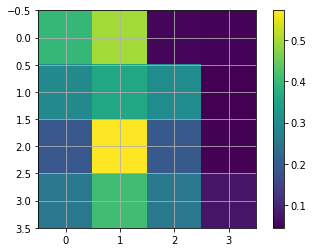

In [4]:
P = trans_counts / trans_counts.sum(axis=1).reshape(-1, 1)
print(P)
plt.imshow(P)
plt.colorbar()
plt.show()

**Úkol 4: nakreslete přechodový graf**

In [5]:
# samostatně na papír

**Úkol 5: vyšetřete stacionární rozdělení.**

In [6]:
P1000 = np.linalg.matrix_power(P, 1000)
print(P1000)

[[0.30054429 0.44665505 0.20289505 0.04990561]
 [0.30054429 0.44665505 0.20289505 0.04990561]
 [0.30054429 0.44665505 0.20289505 0.04990561]
 [0.30054429 0.44665505 0.20289505 0.04990561]]
